# Astronomical Techniques: Fourier Analysis
### Or, Astronomy Confirmed wAvY
In this short tutorial, I will discuss what a Fourier series is, and how we can use it to analyze periodic signals in astronomy. `Python` is a natural tool to use in this endeavour.

#### The Fourier Series
To motivate understanding the Fourier series, consider the simple harmonic oscillator (SHO), perhaps constructed of a point mass attached to a spring. The oscillatory motion of the SHO may be described by

$x(t) = A \sin(\omega t)$,

where $A$ is the amplitude of oscillation, and $\omega$ is the angular frequency, which is related to the period $P$ of oscillation by $\omega = 2 \pi / P$.

This is a clean mathematical description of a very simple periodic signal, but what happens if our system is more complicated? A periodic signal may be made of *many* SHOs, with different amplitudes and oscillation periods. Moreover, the signal of interest may not even be necessarily *periodic*!

Thus, we are motivated to define the general decomposition of a function $f(t)$ in terms of sines and cosines, if such a decomposition exists. There are, in fact, many ways to write the Fourier series. For brevity, we'll consider just one form.

For any continuous real-valued function $s(x)$ of the real-valued number $x$ that can be integrated over some range $[x_0, x_0 + P]$, we can approximate the function with a partial sum:

$s(x) \sim s_N(x) \equiv \dfrac{1}{2}a_0 + \sum\limits_{n=1}^N \left[ a_n \cos\left(\dfrac{2 \pi n x}{P}\right) + b_n \sin\left(\dfrac{2 \pi n x}{P}\right)\right]$,

where $N \geq 1$ is the number of terms to include. When $N \to \infty$, this becomes an infinite sum and $s_N(x) \to s_\infty (x)$ is the Fourier series.

The first term is the offset of the function -- we will discuss this later, but for now we'll assume $a_0 = 0$ for simplicity. This description includes both sines and cosines because they constitute an *orthonormal basis*. Finally, the real-valued coefficients $a_n$ and $b_n$ can be found via:

$a_n = \dfrac{2}{P}{\displaystyle \int_{x_0}^{x_0+P} s(x) \cos\left(\dfrac{2 \pi n x}{P}\right) dx}$

$b_n = \dfrac{2}{P}{\displaystyle \int_{x_0}^{x_0+P} s(x) \sin\left(\dfrac{2 \pi n x}{P}\right) dx}$

As an example, let's consider the simple sawtooth wave:

$s(x) = \dfrac{x}{\pi}$, $x \in [0, 2\pi]$

$s(x + 2\pi k) = s(x)$, $k \in \mathbb{Z}$

I have coded up an interactive plot of the function and its Fourier approximation. Note how the convergence changes as we use more terms (i.e., as $N$ grows):

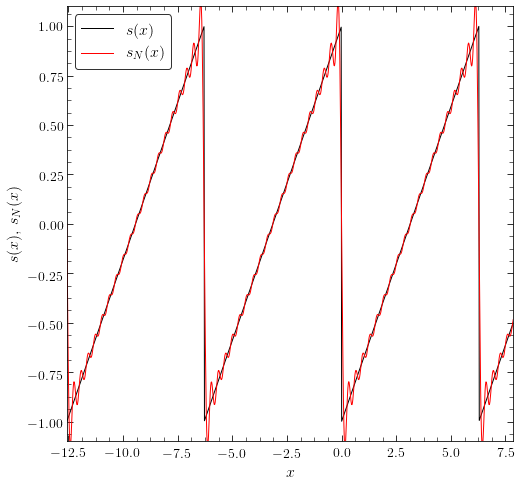

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ipywidgets import interactive  # only works with jupyter notebook, not jupyter lab!

# preliminaries
rcParams['figure.figsize'] = (8, 8)
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 16
rcParams['legend.fontsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

# function to approximate: sawtooth wave
def sawtooth(x):
    from scipy.signal import sawtooth  # period of 2pi over [0, 2pi]
    return sawtooth(x, width=1)
# Fourier approximation
def Fsawtooth(x, N):
    x = np.array(x)
    def bcoeff(n):
        return -2 / (np.pi * n)
    def summand(x, n):
        return bcoeff(n) * np.sin(n * x)  # only defined for n ≥ 1
    return np.array([np.sum([summand(X, n) for n in np.arange(1, N)]) for X in x])
# interactive figure
def fig(N=2):
    x = np.linspace(-4*np.pi, 2.5*np.pi, 1000)
    plt.figure()
    plt.plot(x, sawtooth(x), c='black', label='$s(x)$')
    plt.plot(x, Fsawtooth(x, N), c='red', label='$s_N(x)$')
    plt.legend(loc='upper left')
    plt.xlim(x.min(), x.max())
    plt.xlabel('$x$')
    plt.ylim(-1.1, 1.1)
    plt.ylabel('$s(x)$, $s_N(x)$')

plot = interactive(fig, N=(1, 20, 1))
output = plot.children[-1]
plot

#### The Fourier Transform
The coefficients above tell us *how much* a given frequency contributes to the overall signal. For a pure sine wave with angular frequency $\omega$, it is clear that $a_n = 0$ for all $n$, and $b_1 = 1, b_n = 0, n > 1$. It is easy to interpret these values: $a_n = 0$ implies that there is **zero** contribution from the cosine terms, and $b_1 = 1, b_n = 0, n > 1$ implies that **all** the signal is coming from a sine wave with period $P$ (angular frequency $\omega = 2\pi/P$). There are some subtleties that I'm smoothing over here, but the message is the same.

Knowing this, we might want a general method to determine the importance of a signal with a given frequency in any function. In our discussion, we have assumed a real-valued function that is integrable over some finite range. Our example calculation considered only a simple function with a finite period. Let us now relax these constraints.

Consider a function $f:\mathbb{R} \to \mathbb{C}$ which is integrable over all space (i.e., the domain is $\mathbb{R}$). Regardless of whether it is periodic or not, can we determine what frequencies are most dominant in our function?

Yes, we can! In fact, for this general function $f(x)$, we can write down a function that acts like the coefficients above (i.e., it tells us about the frequencies that make it up). This function is called the *Fourier transform* (FT), and it looks like this:

$\hat f(\omega) = {\displaystyle \int_{-\infty}^\infty f(x) e^{-2 \pi i \omega x}dx}$.

How is this like our coefficients above? First, recall the general form of Euler's famous equation:

$e^{i \xi} = \cos(\xi) + i \sin(\xi)$.

This allows us to write sines and cosines in terms of complex exponentials, and also more succinctly encodes the amplitude and phase of a given wave. I will leave it to *you* to investigate the math further, but the punchline is this:

##### The Fourier coefficients ($a_n$, $b_n$) are just the Fourier transform $\hat f(\omega)$ sampled on a grid, where the magnitudes and spacing on this grid are scaled down by the period $P$.

Since we constructed $\hat f(\omega)$ from a generalized function, we are not beholden to a given period. Thus, $\hat f(\omega)$ is a function that tells us how much of *any* frequency is present in our original signal $f(x)$.

A beautiful property of the FT is that it is *invertible*. Given a function $\hat f(\omega)$, we can reconstruct the function $f(x)$ as follows:

$f(x) = {\displaystyle \int_{-\infty}^\infty \hat f(\omega) e^{2 \pi i \omega x}d\omega}$.

This is called the *inverse Fourier transform*.

#### Fourier Analysis
The FT and its inverse are often used when dealing with functions of time. Suppose we have a time-varying signal $f(t)$ which we do not require to be periodic, but we do require that $t \in \mathbb{R}$. The FT of this function, $\hat f(\omega)$ gives us the **power spectrum** -- the contribution of any given frequency. Here, $\omega$ is the angular frequency in Hz.

How can we better interpret $\hat f(\omega)$? As an analogy, recall the Poynting vector $\vec S$, which represents the directional (i.e., vector) energy flux of a microscopic EM field. For special cases, the flux density can be written as

$\langle S \rangle \propto \left|E\right|^2$.

That is, the flux density is related to the square of the amplitude of the electric field. In a similar fashion, the **power spectral density** $P$ (or just the power spectrum) can be written as

$P \propto \left|\hspace{0.1cm}\hat f(\omega)\right|^2$.

The reason that we square the amplitude is to do away with any complex numbers, and to remove phase offsets. The units of $P$ are just the units of $f$ squared.

All of this is to say that if we have a signal $f(t)$, we can compute the power spectrum $P \propto |\hspace{0.1cm}\hat f(\omega)|^2$ to determine the most important frequencies.

#### Lomb-Scargle Periodograms
##### Or, Wow What a Great Name

It's important to note that we have been living in a fantasy world. All our previous discussion has been focused on very well-behaved functions -- continuous, integrable, etc.

In the real world, i.e., when we're dealing with actual data, this is never true. Usually, we have discrete datasets, often with inconsistent sampling, and including errors. This makes the continuous FT impossible.

There is a discrete version of the Fourier transform -- helpfully called the *discrete Fourier transform* (DFT). As you might expect, it amounts to replacing

${\displaystyle \int_{-\infty}^\infty dt}$

with

${\displaystyle \sum\limits_{k=0}^{N-1}}$

for $N$ samples over a finite time range **that are uniformly spaced**. This last point is important: the DFT assumes your discrete sampling has an even spacing. This does us no good if we have data with an irregular (or lack of) cadence.

This is where the concept of *least-squares spectral analysis* (LSSA) comes in. In its most general form, LSSA is simply a way of approximating a power spectrum for a general discretely sampled dataset. Its basic steps are as follows:

* Create a set of basis functions, typically sines and cosines

* Approximate the data as a weighted sum of the basis functions

* Select frequencies for the basis functions that minimizes the errors

How you actually *choose* the frequencies is a complex matter, with multiple approaches. In the classic Lomb-Scargle method, this is done by progressibly checking pairs of basis functions and finding the frequencies that make them orthogonal, then choosing the weights based on this.

The "least-squares" portion of LSSA comes in the fact that the frequency (and weighting) selection process is optimized to reduce

$\chi^2 = \sum (x_{\rm data} - x_{\rm model})^2$.

Let's look at the Lomb-Scargle periodogram in practice.

In the following, I have created some mock data for a handful of "variable stars". Noise has been injected into the signals to approximate real observations.

First, let's look just look at the data itself:

In [20]:
from astropy.io import ascii

# import data
fullpath = '/Users/luca/Documents/GradSchool/ASTR3130_2019/Lab4/'
file = path.join(fullpath, 'MockData.txt')

data = ascii.read(file)
data

time,mag1,err1,mag2,err2,mag3,err3,mag4,err4
float64,float64,float64,float64,float64,float64,float64,float64,float64
0.195,9.044,0.28,7.069,0.432,13.567,0.249,12.848,0.156
0.315,7.342,0.372,7.929,0.166,14.039,0.147,12.806,0.257
0.601,8.151,0.271,7.63,0.184,12.717,0.084,10.363,0.186
0.871,8.037,0.138,7.209,0.051,11.929,0.023,10.781,0.225
0.991,7.063,0.005,6.727,0.037,12.157,0.178,10.995,0.119
1.006,6.785,0.193,6.585,0.131,12.271,0.136,10.666,0.418
1.111,7.505,0.433,6.213,0.178,12.567,0.414,10.782,0.175
1.276,8.527,0.063,5.858,0.159,13.87,0.107,9.18,0.413
1.712,6.869,0.207,5.997,0.319,12.219,0.354,12.569,0.062


For this example, I've created a mock dataset consisting of observations of 4 'stars' over a range of times (in MJD). The stars are assumed to be variable stars with intrinsic light curves given by pure sine waves, i.e.
```python
mag = np.sin(2 * np.pi * t / P)  # assume an amplitude of amp = 1
```
The observations have some errors associated with them, and the times are randomly sampled over the full range.

Note that star 4 is special --- instead of a single pure sine wave, it is actually a sum of two sinusoids, and so has two periods associated with it.

Let's extract the times and magnitudes (+ errors) for star 1:

In [62]:
# split data
time = data['time']  # in MJD; randomly sampled across light curves
mag1, err1 = data['mag4'], data['err4']  # instrumental mag & errors, arbitrary units

What do our observations actually look like? Let's make a simple plot to see:

Text(0,0.5,'Instrumental Magnitude (arbitrary units)')

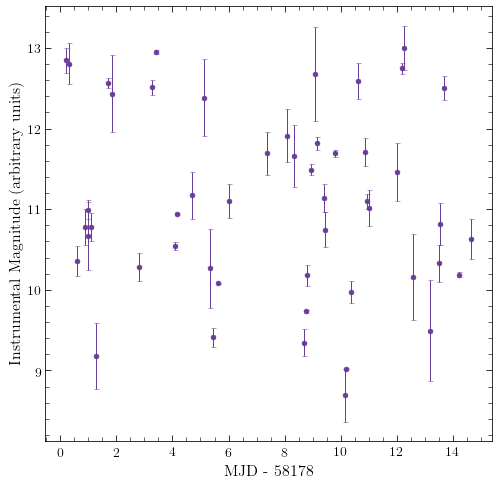

In [63]:
# simple plot of data
fig, ax = plt.subplots()
ax.errorbar(time, mag1, yerr=err1, c='#6a3d9a', fmt='.', markersize=10, capsize=2.5)  # include errors
ax.set_xlabel('MJD - 58178')
ax.set_ylabel('Instrumental Magnitude (arbitrary units)')

Just from the scatter plot, it's not obvious that this is a variable star. This is partly because we have errors in our measurements, but also because our light curve was randomly sampled. If we took an observation every two hours from $t = 0$ to $t = t_{\rm max}$ then we might be able to see the oscillations better. 

$\textit{This is why it's important to get good coverage on your light curves!}$

Obviously, our results will have errors associated with them.

Now that we've read in our observations, let's construct a periodogram using the Lomb-Scargle algorithm. This requires that we search through a variety of frequencies to find what fits our observations best. A spike in a periodogram means there's a high likelihood that the variability associated with this frequency is in our data.

`Python`, through the `AstroPy` package, has a built-in method for computing Lomb-Scargle periodograms:

```Python
from astropy.stats import LombScargle
```

This function essentially does the work for us, with the obvious caveat that there are a lot of knobs that you can turn if you so choose. Let's construct a basic periodogram for our star:

In [64]:
from astropy.stats import LombScargle

# construct Lomb-Scargle periodogram
freq, power = LombScargle(time, mag1+0*np.random.rand(len(mag1)), fit_mean=False).autopower()  # predetermined frequency grid

Again, let's plot this to see what it looks like:

Text(0,0.5,'Power (arbitrary units)')

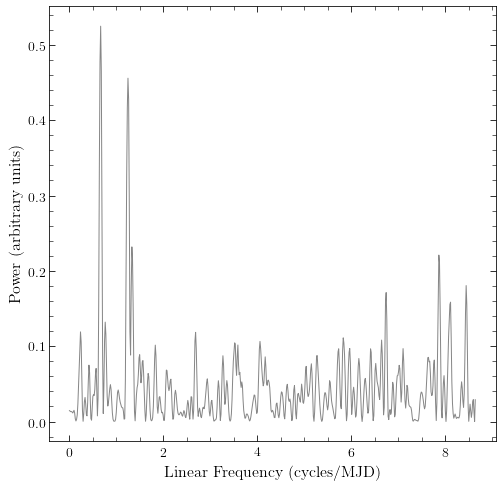

In [65]:
# simple periodogram
fig, ax = plt.subplots()
ax.plot(freq, power)
ax.set_xlabel('Linear Frequency (cycles/MJD)')
ax.set_ylabel('Power (arbitrary units)')

**It's important to note that this algorithm returns *linear* frequencies.** That is, the units are in cycles per unit time. Make sure you account for this!

To interpret this: the bigger the peak, the more that frequency contributes to the overall signal.

For our data, it's quite safe to believe the biggest peak (note that the other peaks are pretty similar to the noise). How do we find the frequency associated with this? Essentially, we want to find the peak, where it's located (i.e., the index of the numpy ndarray), and then we can find the frequency at that same location/index. I'm demonstrating two methods here:

In [66]:
# pull out peak
peak = max(power)  # y-value of peak
peakfreq = freq[np.where(power == peak)][0]  # pull corresponding linear frequency
print(peak, peakfreq)

# alternative method
peakidx = np.argmax(power)  # index of peak
peakfreq2 = freq[peakidx]  # pull corresponding linear frequency
print(peakidx, peakfreq2)

# calculate corresponding period
period = 1 / peakfreq  # in MJD
period2 = 1 / peakfreq2  # in MJD
print(period, period2)

0.5248089417720065 0.6708160442600277
48 0.6708160442600277
1.490721649484536 1.490721649484536


Ok, so it looks like the period of star 1 is $P_1 = 0.6$ MJD. How might you check this? What kind of errors are associated with this? (We'll discuss this!)

Note that for star 4, np.argmax() or max() will not work for finding the second peak. How can you work around this?

### Phase Folding

One way to check your period is to do *phase folding*. This is a way to get around the fact that your actual data may be spread over a large time range (i.e. multiple periods of the object of interest). If your period is correct, then phase folding will yield a very nice light curve.

How do you actually **do** phase folding? Essentially, you want to convert your actual times into fractions of the period -- that is, you should end up with "times" in the range [0, 1]. 

Suppose that you have a time $t$ that is smaller than the period $P$. Then the fraction $t/P$ will be less than unity, and you actually don't have to do anything.

Now suppose you have a time $t$ that is *greater* than the period $P$. The fraction $t/P > 1$, but we don't actually *care* about the integer component (e.g., if $t/P = 2.87$, we're not interested in the 2). The decimal component is telling us how far into the cycle this time sample went, so we just want to extract that. In Python, the way to do this is:

```Python
m % n
```

`%` is the modulo operator, and gives you the remainder of m / n. One easy way to get the decimal component for our purposes is to just do

```Python
phase = t/P % 1
```

Let's see if our derived period is reasonable!

Text(0,0.5,'Instrumental Magnitude (arbitrary units)')

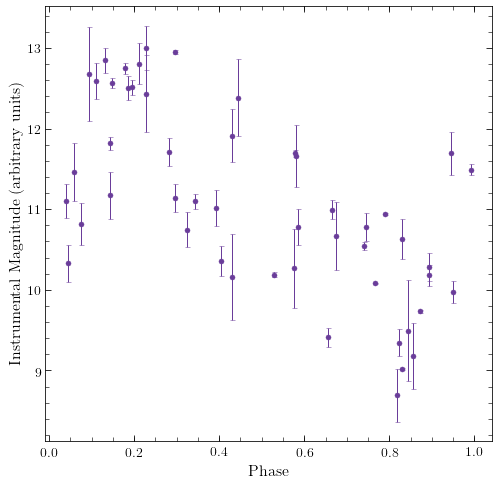

In [67]:
phase = time/period % 1

# simple plot of data
fig, ax = plt.subplots()
ax.errorbar(phase, mag1, yerr=err1, c='#6a3d9a', fmt='.', markersize=10, capsize=2.5)  # include errors
ax.set_xlabel('Phase')
ax.set_ylabel('Instrumental Magnitude (arbitrary units)')